# Analisi della regressione lineare multipla

L'analisi di regressione lineare multipla è una generalizzazione dell'analisi di regressione lineare semplice al caso in cui si ipotizza che la variabile di risposta sia influenzata da più di una covariata, diciamo da $p$ covariate.
Ti mostro un classico utilizzo del modello di regressione lineare multipla attraverso il seguente esempio. 

Un imprenditore vuole analizzare e costruire un modello previsionale per stimare il tempo necessario al rifornimento dei distributori automatici di bibite nel proprio centro commerciale. Le attività di rifornimento includono anche attività di manutenzione minore. 

Sono disponibili 25 osservazioni $y_i$ ($i=1,2,\dots,25$) della variabile di risposta *tempo al rifornimento* `delivery_time` nel file `delivery_time_data.csv`, che puoi importare attraverso la funzione `read.csv()`, insieme alle variabili
* *numero di colli/scatole di prodotti da rifornire* `number_of_cases` ($x_{1i}$)
* *distanza percorsa dal corriere* `distance_ft` ($x_{2i}$)
che puoi esplorare in modo preventivo.

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,number_of_cases,distance_ft,delivery_time
,<int>,<int>,<dbl>
1,7,560,16.68
2,3,220,11.50
3,3,340,12.03
4,4,80,14.88
5,6,150,13.75
6,7,330,18.11


,number_of_cases,distance_ft,delivery_time
number_of_cases,1.0000000,0.8242150,0.9646146
distance_ft,0.8242150,1.0000000,0.8916701
delivery_time,0.9646146,0.8916701,1.0000000


,number_of_cases,distance_ft,delivery_time
number_of_cases,1.0000000,0.6793304,0.9304813
distance_ft,0.6793304,1.0000000,0.7950755
delivery_time,0.9304813,0.7950755,1.0000000


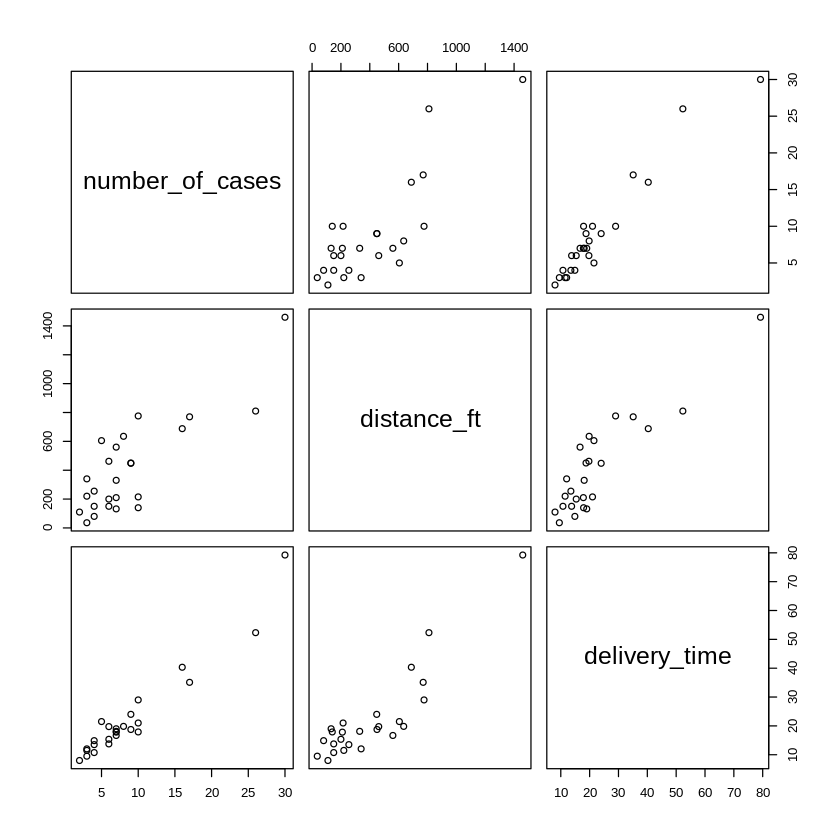

In [1]:
library(tidyverse)
delivery_data <- read.csv("data/delivery_time_data.csv")
head(delivery_data)
plot(delivery_data)
cor(delivery_data)
cor(delivery_data)^2

Guardando i dati a disposizione, la matrice di correlazione e quella dei coefficienti di determinazione, potresti  pensare di utilizzare due modelli di regressione semplice separati per trarre informazioni e stimare 
* tempo al rifornimento in funzione del solo numero di colli/scatole di prodotti da rifornire 
`delivery_time ~ number_of_cases`


Call:
lm(formula = delivery_time ~ number_of_cases, data = delivery_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5811 -1.8739 -0.3493  2.1807 10.6342 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.321      1.371   2.422   0.0237 *  
number_of_cases    2.176      0.124  17.546 8.22e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.181 on 23 degrees of freedom
Multiple R-squared:  0.9305,	Adjusted R-squared:  0.9275 
F-statistic: 307.8 on 1 and 23 DF,  p-value: 8.22e-15


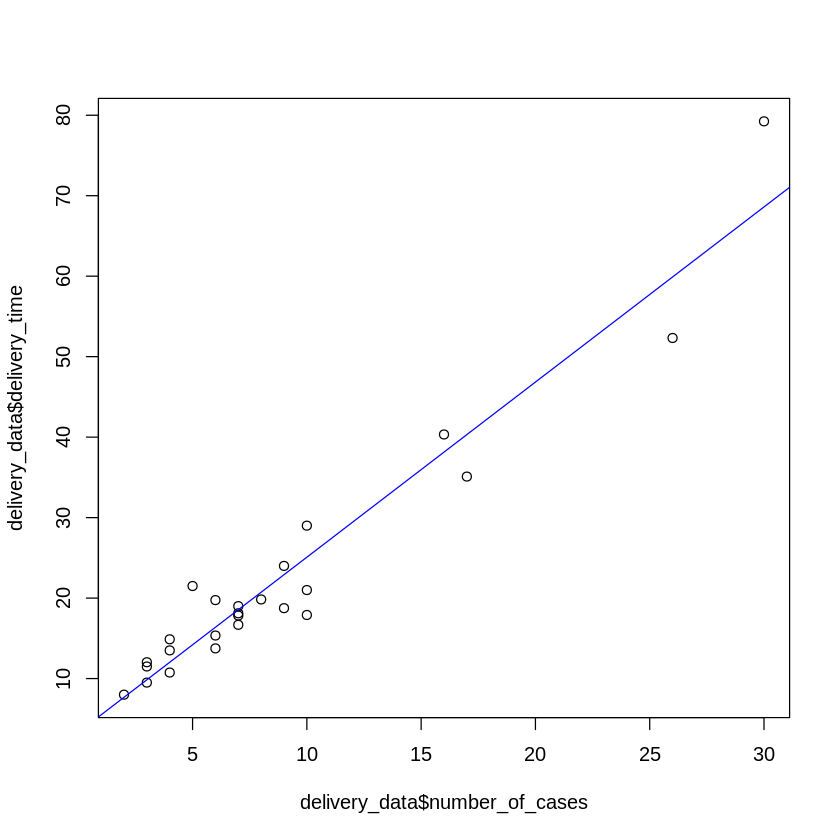

In [2]:
mod_simple1 <- lm(delivery_time ~ number_of_cases, data = delivery_data)
summary(mod_simple1)

plot(delivery_data$number_of_cases, delivery_data$delivery_time)
abline(a=mod_simple1$coefficients[[1]],
       b=mod_simple1$coefficients[[2]],
        col = "blue") 

* tempo al rifornimento in funzione della sola distanza percorsa dal corriere  
`delivery_time_min ~ distance_ft`


Call:
lm(formula = delivery_time ~ distance_ft, data = delivery_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.1628  -4.8783  -0.5966   6.0810  12.8776 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.961159   2.337360   2.123   0.0448 *  
distance_ft 0.042569   0.004506   9.447 2.21e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.179 on 23 degrees of freedom
Multiple R-squared:  0.7951,	Adjusted R-squared:  0.7862 
F-statistic: 89.24 on 1 and 23 DF,  p-value: 2.214e-09


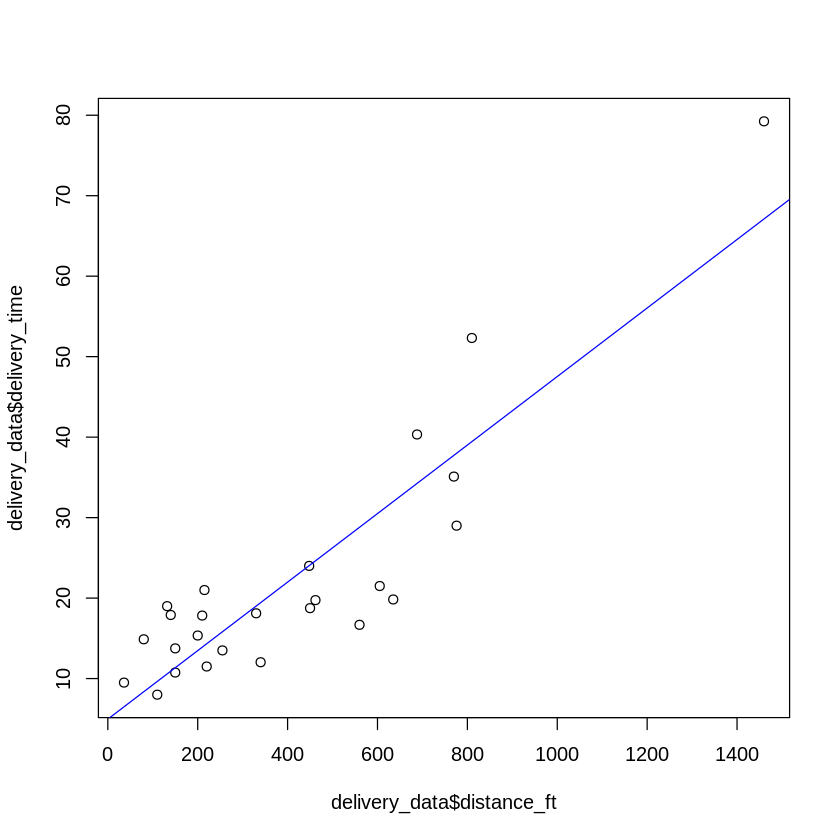

In [3]:
mod_simple2 <- lm(delivery_time ~ distance_ft, data = delivery_data)
summary(mod_simple2)

plot(delivery_data$distance_ft, delivery_data$delivery_time)
abline(a=mod_simple2$coefficients[[1]],
       b=mod_simple2$coefficients[[2]],
        col = "blue") 

Come puoi osservare dai bassi p-value, c'è una dipendenza lineare di `delivery_time` con  entrambe le variabili. Tuttavia, l'uso di due modelli separati non riesce a sfruttare eventuali informazioni aggiuntive portate in dote dal secondo regressore/predittore. Resta inoltre ambiguo quale, tra i due modelli, usare per la predizione o, eventualmente, come combinare le previsioni ottenute dai due modelli.

## Stima del modello di regressione lineare multipla con `lm()`
Un modello unico, formulato come segue e detto *modello di regressione lineare multipla*, può quindi risultare più appropriato

$$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i1} + \varepsilon_i, \quad i=1,2,\dots,25.$$

Le osservazioni della variabile di risposta, denotata con $y$, sono contenute  nella colonna `delivery_time`. Le osservazioni delle due variabili indipendenti (che, come al solito, chiameremo indistintamente anche regressori, covariate o predittori), denotate rispettivamente con $x_1$ e $x_2$, sono contenute nelle colonne `number_of_cases` (numero di scatole) e `distance_ft` (distanza percorsa dal corriere).

Per l'applicazione del metodo dei minimi quadrati alla stima dei coefficienti di regressione (o parametri) non c'è in `R` alcuna differenza, rispetto al caso della regressione lineare semplice. 
Si utilizza la funzione `lm()` aggiungendo il secondo regressore/predittore attraverso il segno `+` seguendo la sintassi della successiva istruzione.

In [4]:
mod_multiple <- lm(delivery_time ~ number_of_cases + distance_ft, 
                   data = delivery_data)
summary(mod_multiple)


Call:
lm(formula = delivery_time ~ number_of_cases + distance_ft, data = delivery_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7880 -0.6629  0.4364  1.1566  7.4197 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.341231   1.096730   2.135 0.044170 *  
number_of_cases 1.615907   0.170735   9.464 3.25e-09 ***
distance_ft     0.014385   0.003613   3.981 0.000631 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 22 degrees of freedom
Multiple R-squared:  0.9596,	Adjusted R-squared:  0.9559 
F-statistic: 261.2 on 2 and 22 DF,  p-value: 4.687e-16


Avrai osservato che la stima del coefficiente relativo alla variabile `number_of_cases` nel modello di regressione semplice (2.176) è diverso da quello stimato nel caso della regressione lineare multipla (1.615907). 

In [5]:
#stima dei coefficienti di regressione nel modello di regressione lineare multipla
mod_multiple$coefficients
beta1_hat_multiple <-mod_multiple$coefficients[[2]] #relativo a number_of_cases 
beta2_hat_multiple <-mod_multiple$coefficients[[3]] #relativo a distance_ft 

#stima dei coefficienti di regressione nel modello di regressione lineare semplice
mod_simple1$coefficients
beta1_hat_simple <-mod_simple1$coefficients[[2]] #relativo a number_of_cases 
mod_simple2$coefficients
beta2_hat_simple <-mod_simple2$coefficients[[2]] #relativo a distance_ft

(Intercept) number_of_cases     distance_ft 
     2.34123115      1.61590721      0.01438483

(Intercept) number_of_cases 
       3.320780        2.176167

(Intercept) distance_ft 
 4.96115886  0.04256949

La stima infatti viene in generale influenzata dall'inserimento nel modello di un altro predittore, che potrebbe, come in questo caso, essere correlata col primo. Questo fenomeno si chiama *collinearità* e potrebbe, come vedremo nella prossima lezione, essere il motivo di non utilizzo del metodo dei minimi quadrati per la stima di un modello di regressione lineare multipla. 

Quando invece la correlazione campionaria delle colonne usate come regressori è pari a 0, i coefficienti di regressione restano invariati. 

Tieni a mente questo aspetto quando parleremo del problema della multicollinearità, in cui la collinearità coinvolge gruppi di più di due variabili senza che alcuna coppia di variabili abbia una correlazione campionaria elevata. Questo aspetto non è nuovo e se ricordi ha motivato anche l'analisi delle componenti principali.

## Test di dipendenza lineare globale e sui singoli predittori
Il test di dipendenza lineare nella regressione lineare multipla perde il significato univoco che aveva nella regressione lineare semplice. Le domande che emergono in questo caso sono almeno di due tipi:
1. Il modello di regressione multipla migliora la previsione rispetto a quella fornita dalla sola media campionaria $\bar y$ (introdotto nei video)? In altre parole, la variabile di risposta è legata linearmente ad almeno uno dei regressori considerati nel modello scelto?
2. Cosa rappresentano `Multiple R-squared` e `Adjusted R-squared`?
3. Cosa rappresentano i singoli coefficienti di regressione? 
4. Che significato assume il p-value nella colonna "Pr(>|t|)"?

Risposte:
1. Per dare risposta alla 1. basta utilizzare l'ultimo p-value restituito da `summary()` (2.859e-14) e confrontarlo con il valore di $\alpha$ prescelto come rischio di prima specie del test. 
2. Se la risposta alla precedente domanda è affermativa (p-value$<\alpha$), il valore di `Adjusted R-squared` continua a fornire una stima della frazione di varianza campionaria della variabile di risposta spiegata dal modello di regressione. In questo caso il valore di `Multiple R-squared` continua a rappresentare il rapporto
$$1-\frac{\sum_{i=1}^n(y_i-\hat y_i)^2}{\sum_{i=1}^n(y_i-\bar y_i)^2}=1-\frac{\sum_{i=1}^n \hat \varepsilon_i^2}{\sum_{i=1}^n(y_i-\bar y_i)^2}$$ ma non rappresenta più il quadrato di una correlazione campionaria.
3. I coefficienti di regressione in questo caso sono da intendersi come stimati a fissato valore degli altri predittori.
4. Sono i p-value associati all'ipotesi nulla $H_0: \beta_i=0$. Se il p-value è basso il coefficiente di regressione è ritenuto significativamente diverso da 0 e quindi l'effetto sulla variabile di risposta del corrispondente predittore (in presenza di tutti gli altri predittori considerati nel modello) viene ritenuto significativo. Tuttavia, come abbiamo già notato per i valori stimati dei coefficienti di regressione, a causa della presenza di altri predittori, i risultati potrebbero cambiare rispetto a quelli ottenuti utilizzando i modelli di regressione semplice. In altre parole, un predittore ritenuto significativo nella regressione semplice, potrebbe non esserlo in un modello di regressione multipla quando viene considerato insieme ad altri predittori.
Osserva che i valori di p-value nella colonna `"Pr(>|t|)"` del summary di `mod_multiple` sono diversi da quelli ottenuti nella tabella `summary(mod_simple1)` e `summary(mod_simple2)`.

Osservazione 1: Quando si eseguono test di dipendenza lineare sui singoli predittori, che non sono tra di loro indipendenti ma dipendono dalla presenza di altri predittori, è necessario che il p-value sia inferiore ad $\alpha/p$ (correzione di Bonferroni) per poter ritenere significativo l'effetto del corrispondente regressore sulla variabile di risposta ed assicurare un rischio di prima specie globale (detto *familywise error rate*) minore o uguale al valore di $\alpha$ pre-fissato. 

Osservazione 2: Il p-value relativo all'intercetta $\beta_0$, in questo corso, non verrà mai preso in considerazione, e l'intercetta verrà sempre inclusa nel modello, sempreché risulti significativo almeno uno dei predittori. I modelli lineari senza intercetta modificano il significato di `R-squared` e fanno perdere al modello stimato coi minimi quadrati alcune proprietà. Per esempio, un modello senza intercetta non passa necessariamente per il baricentro dei punti, poiché il vettore dei residui non è più vincolato ad avere media campionaria nulla.


## Intervallo di confidenza dei coefficienti di regressione
In generale, i coefficienti di un modello di regressione lineare multipla sono di norma denotati con $\beta_1, \beta_2, \ldots, \beta_p$, dove $p$ rappresenta il numero di predittori.
L'intervallo di confidenza al livello di fiducia $1-\alpha$ per ognuno dei coefficienti $\beta_i$ ($i=0,1,\ldots,p$) è un intervallo, calcolato sulla base del campione sperimentale, che contiene, con fiducia pari ad $1-\alpha$, il valore vero di $\beta_i$. $\alpha$ è come sempre un valore compreso tra 0 e 1, tipicamente posto pari a 0.05. 

In analogia al modello di regressione lineare semplice ($p=1$), l'intervallo di confidenza per ogni  $\beta_i$ ($i=0,1,\ldots,p$) è centrato sulla stime $\hat \beta_i$ ed ha  semiampiezza pari al prodotto della deviazione standard stimata di $\hat \beta_i$ per il quantile $t_{1-\alpha/2,\nu}$, dove il numero di gradi di liberta $\nu$ in questo caso è pari a $n-p-1$. Ossia 

$$\left( \hat \beta_i - t_{1-\alpha/2,n-p-1} \hat \sigma_{\hat \beta_i}, \hat \beta_0 + t_{1-\alpha/2,n-p-1} \hat \sigma_{\hat \beta_i} \right)$$

Le stime $\hat \sigma_{\hat \beta_i}$ sono come al solito disponibili in `summary(modello_regressione)$coefficients[, "Std. Error"]`.

Tuttavia, non solo la stima $\hat \beta_i$ ($i=0,1,\ldots,p$), ossia il centro di tali intervalli, come abbiamo già osservato, dipende, in generale, dalla presenza/assenza di altri predittori inclusi nel modello, ma anche la loro ampiezza può essere modificata dalla presenza di predittori correlati tra loro, come vedi anche in questo semplice esempio.

### Coefficiente di regressione relativo alla variabile `number_of_cases`

In [6]:
#deviazione standard dello stimatore del coefficiente di regressione relativo a number_of_cases 
#nel modello di regressione lineare multipla
sigma_hat_beta1_multiple <- summary(mod_multiple)$coefficients[, "Std. Error"][[2]]
sigma_hat_beta1_multiple  %>% round(3)

#deviazione standard dello stimatore del coefficiente di regressione relativo a number_of_cases 
#nel modello di regressione lineare semplice
sigma_hat_beta1_simple <- summary(mod_simple1)$coefficients[, "Std. Error"][[2]]
sigma_hat_beta1_simple %>% round(3)

[1] 0.171

[1] 0.124

In [7]:
#Intervallo di confidenza per la stima del coefficiente di regressione relativo a number_of_cases 
#nel modello di regressione lineare multipla
n <- nrow(delivery_data); n #ampiezza campionaria
df <- mod_multiple$df.residual; df #ossia n-3
alfa <- 0.05
t_0975 <- qt(1-alfa/2, df)
I_beta1_sup <- beta1_hat_multiple + t_0975 * sigma_hat_beta1_multiple #estremo superiore
I_beta1_inf <- beta1_hat_multiple - t_0975 * sigma_hat_beta1_multiple #estremo inferiore
c(I_beta1_inf,I_beta1_sup) %>% round(2)
(I_beta1_sup-I_beta1_inf) %>% round(2)

#Intervallo di confidenza per la stima del coefficiente di regressione relativo a number_of_cases 
#nel modello di regressione lineare semplice
n
df <- mod_simple1$df.residual;df #ossia n-2
alfa <- 0.05
t_0975 <- qt(1-alfa/2, df)
I_beta1_sup <- beta1_hat_simple + t_0975 * sigma_hat_beta1_simple #estremo superiore
I_beta1_inf <- beta1_hat_simple - t_0975 * sigma_hat_beta1_simple #estremo inferiore
c(I_beta1_inf,I_beta1_sup) %>% round(2)
(I_beta1_sup-I_beta1_inf) %>% round(2)

[1] 25

[1] 22

[1] 1.26 1.97

[1] 0.71

[1] 25

[1] 23

[1] 1.92 2.43

[1] 0.51

### Coefficiente di regressione relativo alla variabile `distance_ft`

In [8]:
#deviazione standard del coefficiente di regressione relativo a distance_ft 
# nel modello di regressione lineare multipla
sigma_hat_beta2_multiple <- summary(mod_multiple)$coefficients[, "Std. Error"][[3]]
sigma_hat_beta2_multiple  %>% round(3)

#deviazione standard del coefficiente di regressione relativo a distance_f
#nel modello di regressione lineare semplice
sigma_hat_beta2_simple <- summary(mod_simple2)$coefficients[, "Std. Error"][[2]]
sigma_hat_beta2_simple %>% round(3)

[1] 0.004

[1] 0.005

In [9]:
#Intervallo di confidenza per la stima del coefficiente di regressione relativo a distance_ft 
#nel modello di regressione lineare multipla
n <- nrow(delivery_data); n #ampiezza campionaria
df <- mod_multiple$df.residual; df #ossia n-3
alfa <- 0.05
t_0975 <- qt(1-alfa/2, df)
I_beta1_sup <- beta2_hat_multiple + t_0975 * sigma_hat_beta2_multiple #estremo superiore
I_beta1_inf <- beta2_hat_multiple - t_0975 * sigma_hat_beta2_multiple #estremo inferiore
c(I_beta1_inf,I_beta1_sup) %>% round(2)
(I_beta1_sup-I_beta1_inf) %>% round(2)

#Intervallo di confidenza per la stima del coefficiente di regressione relativo a distance_ft 
#nel modello di regressione lineare semplice
n
df <- mod_simple2$df.residual;df #ossia n-2
alfa <- 0.05
t_0975 <- qt(1-alfa/2, df)
I_beta1_sup <- beta2_hat_simple + t_0975 * sigma_hat_beta2_simple #estremo superiore
I_beta1_inf <- beta2_hat_simple - t_0975 * sigma_hat_beta2_simple #estremo inferiore
c(I_beta1_inf,I_beta1_sup) %>% round(2)
(I_beta1_sup-I_beta1_inf) %>% round(2)

[1] 25

[1] 22

[1] 0.01 0.02

[1] 0.01

[1] 25

[1] 23

[1] 0.03 0.05

[1] 0.02

Come vedi, sia le ampiezze che il centro degli intervalli di confidenza dei coefficienti di regressione, come ci aspettavamo in caso di predittori correlati, cambiano dal modello di regressione semplice al modello di regressione multipla. Questo problema è ancora più drammatico ed evidente all'aumentare del numero di predittori $p$ inclusi nel modello.

Ai fini didattici, presentiamo, in analogia a quanto fatto per la regressione lineare semplice gli intervalli di confidenza della media della variabile di risposta. Chiaramente tali intervalli non possono essere visualizzati in questo caso in un grafico a due dimensioni, così come le corrispondenti bande di confidenza e previsione.

## Intervallo di confidenza della media della variabile di risposta 

Anche per il modello di regressione lineare multipla è possibile definire e calcolare l'intervallo di confidenza per la media $\mu_{y|x}=\beta_0+\beta_1x_1+...+\beta_px_p$ della variabile di risposta a prefissati valori delle variabili indipendenti $x_1,...,x_p$. 

Come nel caso della regressione lineare semplice, puoi ottenere tale intervallo, mediante la funzione `predict()`. Supponiamo di voler calcolare l'intervallo di confidenza al livello di fiducia $1-\alpha=0.95$ per la media $\mu_{y|x}$ in corrispondenza di 
* numero di colli/scatole di prodotti da rifornire `number_of_cases` pari a 25
* distanza percorsa dal corriere* `distance_ft` pari a 1000 ft

In [10]:
alfa=0.05
predict(mod_multiple, interval = "confidence", level=1-alfa,
        newdata = data.frame(number_of_cases = 25, distance_ft=1000))

,fit,lwr,upr
1,57.12374,53.58409,60.66338


La sintassi delle istruzioni in R come vedi non è molto comoda per calcolare l'intervallo di confidenza in corrispondenza di un singolo valore, ma torna utile nel caso volessi considerare un data frame di nuovi valori, per esempio

In [11]:
x_new <- data.frame(number_of_cases = c(15,30,25), distance_ft=c(1000,750,300))
           
predict(mod_multiple, interval = "confidence", level=1-alfa,
        newdata = x_new )

,fit,lwr,upr
1,40.96467,37.77399,44.15534
2,61.60707,55.84027,67.37386
3,47.05436,40.47211,53.63661


o in corrispondonza dei valori del training sample.

In [12]:
predict(mod_multiple, interval = "confidence")

,fit,lwr,upr
1,21.708084,19.551297,23.864872
2,10.353615,8.556216,12.151013
3,12.079794,9.955744,14.203843
4,9.955646,7.980522,11.930770
5,14.194398,12.343039,16.045757
6,18.399574,17.000017,19.799132
7,7.155376,5.222061,9.088692
8,16.673395,14.966973,18.379818
9,71.820294,67.048610,76.591977
10,19.123587,16.128667,22.118507


## Intervallo di previsione della variabile di risposta

Come nel caso della regressione semplice, si può calcolare l'intervallo di previsione della variabile di risposta `delivery_time` anche nel caso della regressione lineare multipla. Il comando in `R` è identico, come osservi dall'istruzione successiva.

In [13]:
predict(mod_multiple, interval = "prediction",
        newdata = x_new)

,fit,lwr,upr
1,40.96467,33.48975,48.43959
2,61.60707,52.72169,70.49244
3,47.05436,37.61932,56.48940


## Grafici diagnostici del modello

Restando nell'ambito dei grafici a due dimensioni, che sono da preferire (a meno di non avere un ambiente interattivo) puoi visualizzare una serie di grafici diagnostici per verificare che le ipotesi su cui si basa la stima del modello e/o la quantificazione dell'incertezza siano plausibili. Tali grafici, che vediamo direttamente qui nel caso della regressione lineare multipla possono essere applicati anche al caso particolare della regressione lineare semplice. 

### Grafico $\hat y_i$ vs $y_i$
Grafico a dispersione dei valori previsti dal modello (previsionale) di regressione, che abbiamo indicato con $\hat y_i$, e i valori osservati $y_i$. 
Ci aspettiamo che migliore sia la previsione più questi punti si allineano su una retta a 45°.

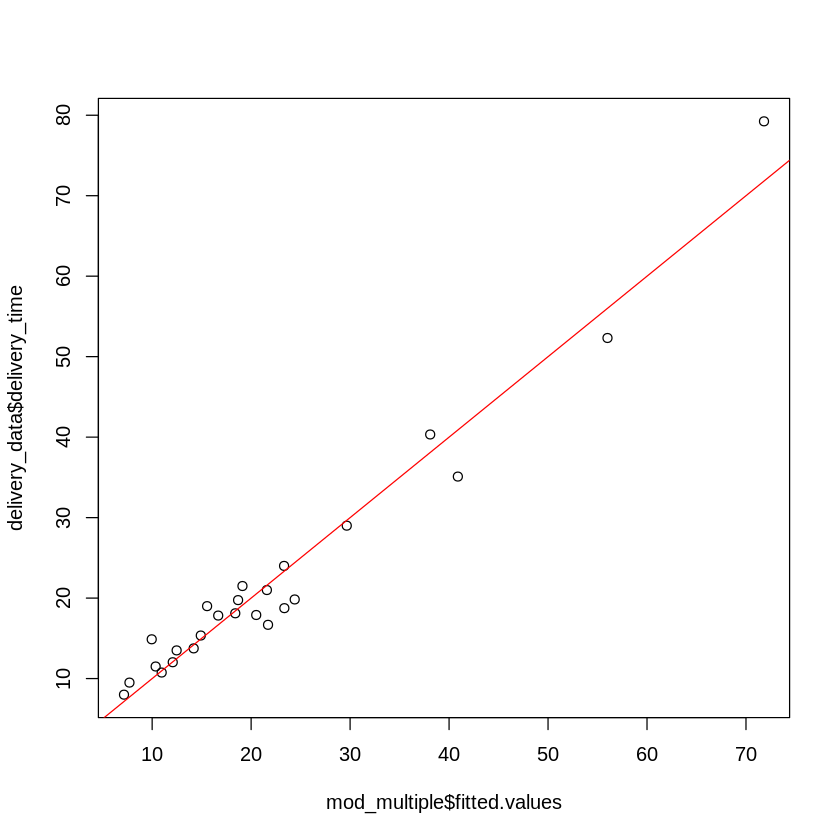

In [14]:
plot(mod_multiple$fitted.values, delivery_data$delivery_time)
abline(0,1, col=2)

### Grafico dei residui 
Se l'indice di riga rispecchia l'ordine con cui sono stati osservati i dati, vale la pena ispezionare che i residui $\varepsilon_i=y_i-\hat y_i$ non mostrino pattern o andamenti non casuali evidenti. In caso contrario l'ipotesi di indipendenza dei residui potrebbe non essere plausibile.

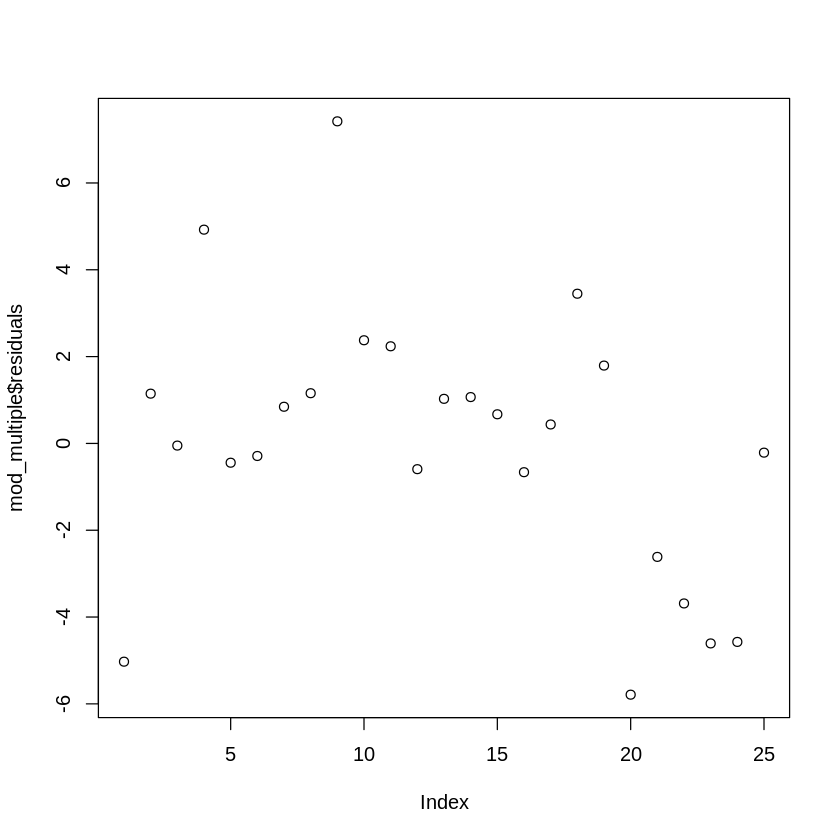

In [15]:
plot(mod_multiple$residuals)

Spesso si preferisce visualizzare, al posto dei residui $\hat \varepsilon_i$ che conosciamo, i cosiddetti *residui studentizzati*, ottenuti dividendo $\hat \varepsilon_i$ per la stima della deviazione standard $\hat \sigma_{\hat \varepsilon_i}$. In tal modo, si cerca di tenere in considerazione che residui con valori delle covariate più lontane dalla media hanno una varianza più bassa, come ti ho fatto già notare nel caso della regressione lineare semplice. I residui studentizzati si possono ottenere facilmente attraverso la funzione `rstandard()`.

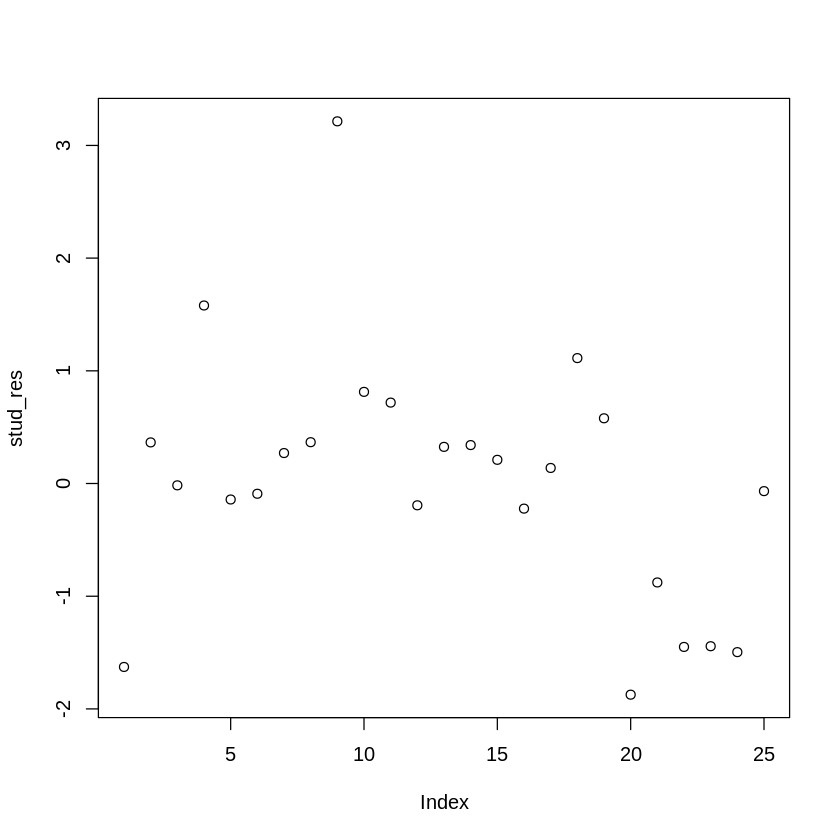

In [16]:
stud_res <- rstandard(mod_multiple)
plot(stud_res)

In questo caso, i residui studentizzati non appaiono molto diversi da quelli non studentizzati. 

### Residui vs $\mathbf x_1$, $\mathbf x_2$ e $\mathbf{ \hat {y}}$

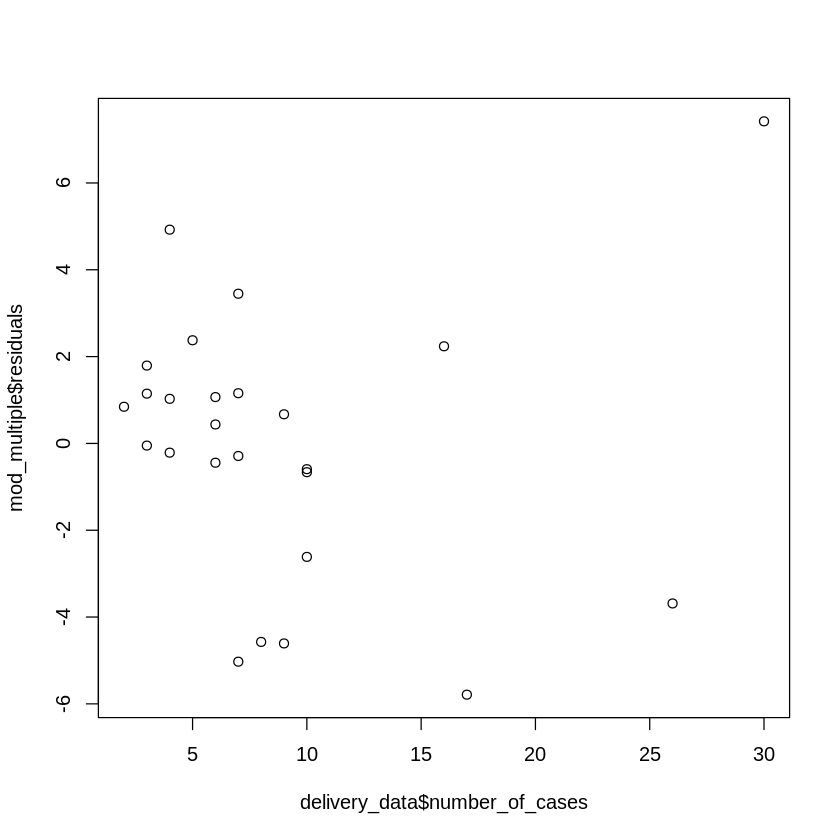

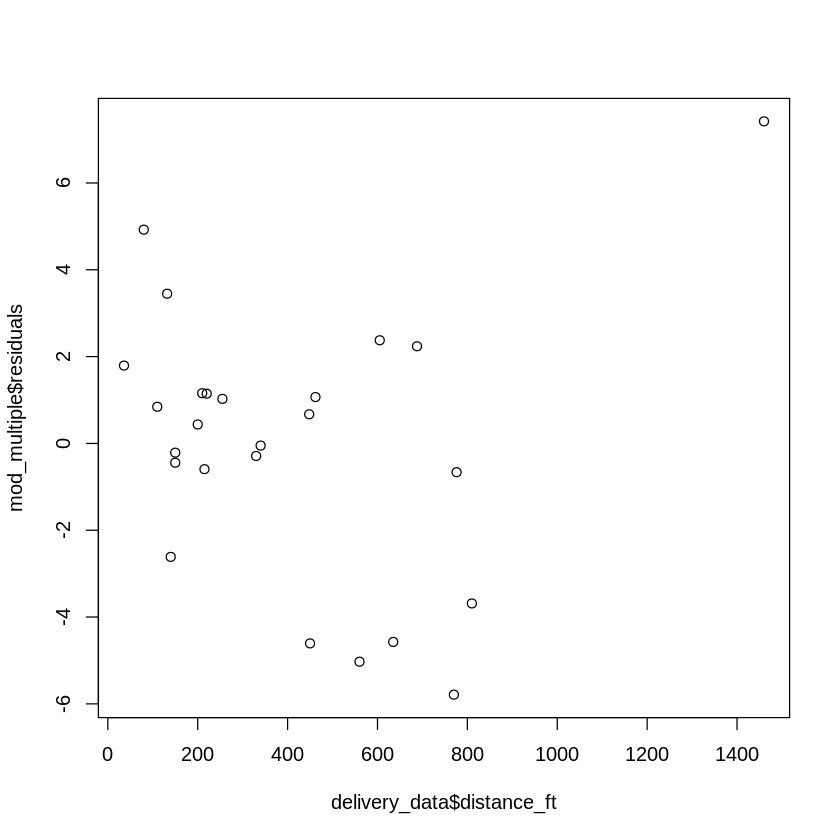

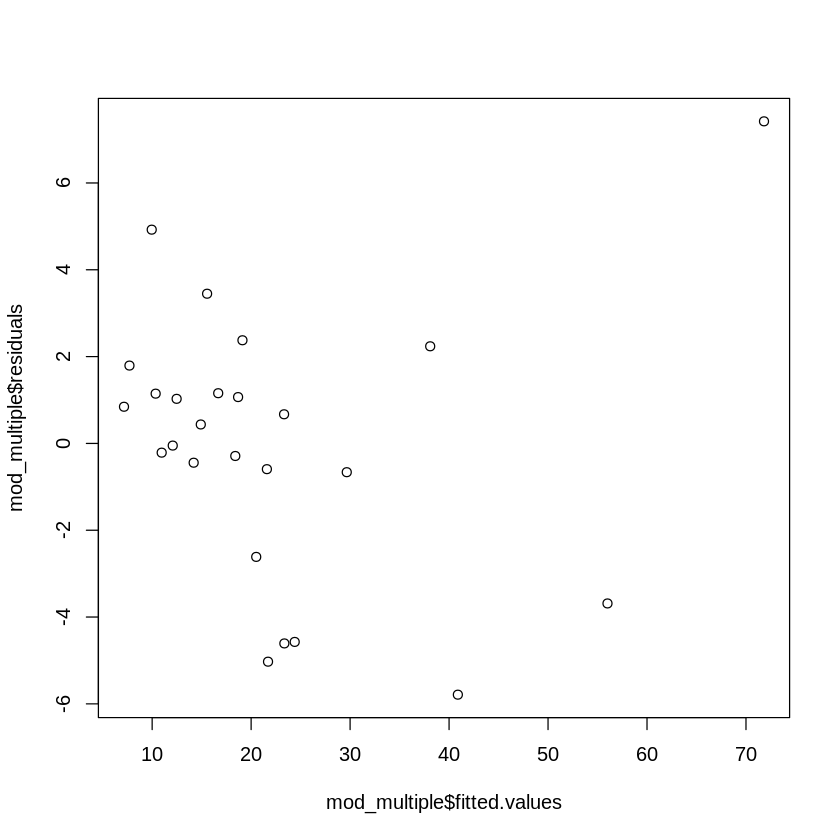

In [17]:
plot(delivery_data$number_of_cases,mod_multiple$residuals)
text(delivery_data$number_of_cases,mod_multiple$residuals, labels=delivery_data$observation_number, pos =1)

plot(delivery_data$distance_ft,mod_multiple$residuals)
text(delivery_data$distance_ft,mod_multiple$residuals, labels=delivery_data$observation_number, pos =1)

plot(mod_multiple$fitted.values,mod_multiple$residuals)
text(mod_multiple$fitted.values,mod_multiple$residuals, labels=delivery_data$observation_number, pos =1)

Se qualcuno di questi grafici mostrasse un comportamento non lineare dei residui, bisogna indagare tale eventualità e modellare la non linearità attraverso una trasformazione di alcune variabili (variabile di risposta e/o predittori).

Tuttavia, questi grafici mostrano la presenza di un valore molto elevato per il residuo corrispondente all'osservazione 9. Tale osservazione potrebbe essere rimossa, se ritenuta non plausibile e frutto per esempio di un errore di misurazione. Se così fosse, potresti rimuoverlo e ripetere le analisi. Altrimenti, rappresenta un caso che vale la pena ispezionare per la sua diversità. In generale, è buona norma ispezionare la presenza di eventuali outlier, ma non è mai consigliato rimuovere osservazioni senza una chiara indicazione da parte degli esperti di dominio o comunque di chi ha condotto la raccolta dati. Tale pratica migliorerebbe il modello, ma nasconderebbe parte della realtà e implicitamente renderebbe il modello inutile a prevedere casi simili a quello rimosso. È il modello a doversi adattare ai dati, che rappresentano l'osservazione sperimentale della realtà, e non il viceversa!

L'analisi di regressione lineare, che finora abbiamo trattato nel caso di predittori numerici, può essere estesa in `R` molto facilmente anche ai predittori discreti, ossia che possono assumere un numero finito di livelli, o addirittura categoriche, codificando opportunamente le modalità di tali variabili. 
Nel prossimo lab RStudio potrai provare, con il famoso dataset `mtcars`, a descrivere il legame tra il consumo di carburante ed un insieme di 10 variabili che descrive le performance ed il design di 32 differenti modelli di automobili, vendute negli anni 1973-1974, e comprende anche variabili di tipo discreto.

# Problemi  da affrontare nella prossima lezione
Avrai capito che l'obiettivo dei modelli lineari di predizione numerica è quello di definire una relazione lineare tra una variabile dipendente (o di risposta) ed un insieme di variabili indipendenti,  dette anche *covariate* o *predittori*.
Sperando di migliorare la relazione lineare e le previsioni della variabile di risposta, si potrebbe essere tentati di includere nel modello tutte le covariate a disposizione . In realtà, forse hai già intuito che ciò potrebbe comportare diversi inconvenienti. Due di essi sono l'*overfitting* (adattamento eccessivo o sovradattamento) e la *multicollinearità*, che affronteremo nella prossima lezione intitolata "Metodi per la selezione del modello interpretativo migliore". 
Ti aspetto!